In [47]:
import sys
sys.path.insert(0, '../BO')

In [48]:
from gp import *
import numpy as np
from sklearn.datasets import fetch_mldata
from BN import *

In [49]:
# Load and format the training and testing data
mnist = fetch_mldata('MNIST original')

In [50]:
BN = BN(mnist)

In [51]:
loss = BN.train_bayesian_nn

In [52]:
bounds = np.array([[-15., 0.0], [20., 60.], [128., 512.], [1., 5.], [0.00001, 1.], [0.00001, 1.], [0.00001, 1.], [0.00001, 2.], [0.00001, 2.]])
# maxeps specifies how many BOs we want to run
maxeps = 6
# n_iters is number of iterations we want for each run of BO
n_iters = 100
acqui_eva_num = 5
greater_is_better = False
n_pre_samples = 3
coor_sigma = 1 * np.array([0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2])
burn_in = 20
input_dimension = 9
mode = 'OPT'
acqui_mode = 'OPT'
acqui_sample_num = 3
process_sample_mode = 'normal'
prior_mode ='normal_prior'
likelihood_mode = 'normal_likelihood'

In [ ]:
y_list = list()
time_list = list() 

for i in range(n_iters):
    y_list.append(list())
for i in range(n_iters):
    time_list.append(list())

for j in range(maxeps):
    print ('Running %d episode' % (j + 1))
    xp, yp, timep = bayesian_optimisation(coor_sigma = coor_sigma, 
                                   burn_in = burn_in, 
                                   input_dimension = input_dimension,
                                   n_iters = n_iters, 
                                   sample_loss = loss, 
                                   bounds = bounds, 
                                   n_pre_samples = n_pre_samples, 
                                   acqui_eva_num = acqui_eva_num,  
                                   greater_is_better=greater_is_better, 
                                   mode = mode, 
                                   acqui_mode = acqui_mode, 
                                   acqui_sample_num = acqui_sample_num,   
                                   process_sample_mode = process_sample_mode, 
                                   prior_mode = prior_mode, 
                                   likelihood_mode = likelihood_mode)
    y_train = yp[n_pre_samples:]
    for idx in range(len(y_train)):
        if idx == 0:
            y_list[idx].append(y_train[idx])
        else:
            y_list[idx].append(np.min(y_train[:idx]))
    for i in range(len(y_train)):
        time_list[i].append(timep[i])

Running 1 episode
Start presampling...
	Learning rate: 0.365534151268, training epochs: 35, batch size: 930, n_samples: 3, prior_sigma: 3.3296385, init_sigma_weights_mu:  4.9629354, init_sigma_biases_mu: 0.5237784, init_sigma_weights_rho: 3.4619734, init_sigma_biases_rho: 0.77898276
Accuracy 0.0946666666667
	Learning rate: 0.796019276045, training epochs: 93, batch size: 1199, n_samples: 2, prior_sigma: 4.377242, init_sigma_weights_mu:  3.6548872, init_sigma_biases_mu: 0.7318111, init_sigma_weights_rho: 0.7020926, init_sigma_biases_rho: 3.1799014
Accuracy 0.0946666666667
	Learning rate: 4.70940769713e-05, training epochs: 128, batch size: 1916, n_samples: 4, prior_sigma: 1.699637, init_sigma_weights_mu:  0.959734, init_sigma_biases_mu: 3.7539334, init_sigma_weights_rho: 4.2576857, init_sigma_biases_rho: 2.3694427
Accuracy 0.0946666666667
Presampling finished.
	Learning rate: 6.16854497011e-05, training epochs: 12, batch size: 190, n_samples: 1, prior_sigma: 1.6402934, init_sigma_weight

Accuracy 0.0951428571429
	Learning rate: 2.07647331127e-05, training epochs: 19, batch size: 823, n_samples: 1, prior_sigma: 0.46630985, init_sigma_weights_mu:  0.67925006, init_sigma_biases_mu: 2.5154912, init_sigma_weights_rho: 4.818928, init_sigma_biases_rho: 0.26105195
Accuracy 0.0946666666667
	Learning rate: 0.00129372589388, training epochs: 127, batch size: 1593, n_samples: 3, prior_sigma: 0.01, init_sigma_weights_mu:  0.02829072, init_sigma_biases_mu: 0.1069187, init_sigma_weights_rho: 3.377304, init_sigma_biases_rho: 1.5229496
Accuracy 0.114666666667
	Learning rate: 0.00427306467128, training epochs: 120, batch size: 1581, n_samples: 2, prior_sigma: 4.899087, init_sigma_weights_mu:  1.6912806, init_sigma_biases_mu: 1.4855136, init_sigma_weights_rho: 4.6834674, init_sigma_biases_rho: 1.8540852
Accuracy 0.0946666666667
	Learning rate: 0.00340626051272, training epochs: 133, batch size: 914, n_samples: 4, prior_sigma: 2.4650488, init_sigma_weights_mu:  4.928388, init_sigma_biases

Accuracy 0.902285714286
	Learning rate: 0.000691080845975, training epochs: 53, batch size: 125, n_samples: 4, prior_sigma: 1.11043, init_sigma_weights_mu:  1.0802847, init_sigma_biases_mu: 3.8383892, init_sigma_weights_rho: 1.7261554, init_sigma_biases_rho: 1.0703996
Accuracy 0.314761904762
	Learning rate: 0.000819563555417, training epochs: 101, batch size: 1768, n_samples: 2, prior_sigma: 2.7439094, init_sigma_weights_mu:  3.795542, init_sigma_biases_mu: 3.0286694, init_sigma_weights_rho: 0.22981375, init_sigma_biases_rho: 3.7929463
Accuracy 0.887904761905
	Learning rate: 1.60573413844e-05, training epochs: 82, batch size: 866, n_samples: 4, prior_sigma: 2.6823163, init_sigma_weights_mu:  0.13710412, init_sigma_biases_mu: 1.0969505, init_sigma_weights_rho: 4.645896, init_sigma_biases_rho: 3.989266
Accuracy 0.0946666666667
	Learning rate: 0.00012141548103, training epochs: 49, batch size: 812, n_samples: 4, prior_sigma: 2.0459394, init_sigma_weights_mu:  1.9128044, init_sigma_biases_

In [ ]:
def return_mean_std(y_list):
    mean_list = list()
    std_list = list()
    for one_list in y_list:
        mean_list.append(np.mean(one_list))
        std_list.append(np.std(one_list))
    return mean_list, std_list
mean_list, std_list = return_mean_std(y_list)

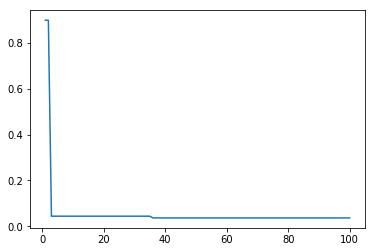

0.03609523809523807

In [18]:
import matplotlib.pyplot as plt
x = [i+1 for i in range(len(y_list))]

plt.errorbar(x, mean_list, yerr = std_list, fmt = '-')

plt.show()
min(mean_list)

In [11]:
import pickle
opt_dict = {}
opt_dict['y_list'] = y_list
with open('BN_MCMC_OPT.pkl','wb') as file:
    pickle.dump(opt_dict, file)

In [15]:
with open('BN_MCMC_OPT.pkl', 'rb') as pickle_file:
    data1 = pickle.load(pickle_file)